## 2.5.3 Challenge_ Validating Linear Regression

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
%matplotlib inline

sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [17]:
import math
import warnings

from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf

In [18]:
df = pd.read_csv("/Users/purva/Desktop/Data Science Boot Camp/table_crime data_csv.csv", header = 1)

In [19]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0.0,NaN
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0.0,NaN
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0.0,NaN
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN,NaN


In [20]:
df['Property\ncrime'] = (df['Property\ncrime']).str.replace(',','')
df['Property\ncrime'] = (df['Property\ncrime']).astype(int)

In [21]:
df['Population'] = (df['Population']).str.replace(',','')
df['Population'] = (df['Population']).astype(int)
df['Robbery'] = (df['Robbery']).str.replace(',','')
df['Robbery'] = (df['Robbery']).astype(int)
df['Violent\ncrime'] = (df['Violent\ncrime']).str.replace(',','')
df['Violent\ncrime'] = (df['Violent\ncrime']).astype(int)

## Feature for population square

In [22]:
df['pop_square'] = df['Population']*df['Population']

## Feature for Robbery and Murder

In [23]:
df['feature_Robbery'] = df['Robbery']
df.loc[df['feature_Robbery'] > 0, 'feature_Robbery'] = 1

In [24]:
df['feature_Murder'] = df['Murder and\nnonnegligent\nmanslaughter']
df.loc[df['feature_Murder'] > 0, 'feature_Murder'] = 1

In [25]:
regr = linear_model.LinearRegression()
Y = df['Property\ncrime'].values.reshape(-1,1)
X = df[['pop_square','feature_Robbery','feature_Murder']]
model1 = regr.fit(X,Y)
print('\nCoefficients: ', regr.coef_)
print('\nIntercept: ', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients:  [[1.99256120e-09 3.00052598e+02 1.18406016e+03]]

Intercept:  [40.08610471]

R-squared:
0.9859871204030131


R-squared regression: 0.9859871204030131
R-squared PLSR: 0.9621760885212045


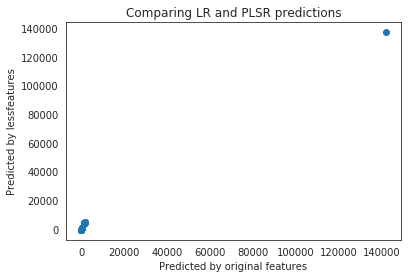

In [29]:
from sklearn.cross_decomposition import PLSRegression
# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, Y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=1)

# Reduce X to R(X) and regress on y.
pls1.fit(X, Y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, Y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original features')
plt.ylabel('Predicted by lessfeatures')
plt.title('Comparing LR and PLSR predictions')
plt.show()